Physics 474 - Spring 2023 <br>

Lab 2:
Solving the Damped Wave Equation for a string

- Solution

<font color='red'>Author: Dillon Walton
    
Some skills you will be practicing: 
- Solving Partial differential equations
- Performing a Fast-Fourier-Transform (FFT) on a signal
- making an animation
- listening to waveforms



________________________________________________________
Lab 2 Background:

Please go over the slides from Lecture with background material for Lab2.

In this lab we will be
- solving the Damped Wave Equation for a string with fixed endpoints and initial values  $u_0 = u(x,0)$
- showing the solution for the amplitude of the vibrations $u(x,t)$ as an anmimation
- sampling the amplitude vs time, $s(t)$,  at a fixed position  $x_p$. $s(t) = u(x_p,t)$
- examining the fourier frequency spectrum $g(f)$  for the signal $s(t)$
- listen to the sound of the signal $s(t)$

In order to accomplish we must first solve the Damped Wave Equation. This is a slight modification of the Wave Equation we saw in class and is posted on ELMS. you are encouraged to use that as a reference starting point.


**Solving the Damped Wave Equation**

The damped wave equation has an additional term to the regular wave equation and can be written

$\frac{\partial^2 u(x,t)}{\partial t^2} + k\frac{\partial u(x,t)}{\partial t}= v^2 \; \nabla^2 u(x,t)$ 

where $k$ is the damping factor and $v$ is the wave velocity. Furhermore, the velocity $v$ is related to wavelength and frequency by

$v =\lambda f$

as determined by the physical characteristics of the media.

In 1 spatial dimension we have,

$\frac{\partial^2 u(x,t)}{\partial t^2} + k\frac{\partial u(x,t)}{\partial t}= v^2\; \frac{\partial^2u(x,t)}{\partial x^2}$ 

using space centered finite difference for spacial derivative, we get for each x-point

$\frac{\partial^2 u(x,t)}{\partial x^2} + k\frac{\partial u(x,t)}{\partial t}= \frac{u(x+a,t)+u(x-a,t)-2u(x,t)}{a^2}$

Then expanding to all x-points on the grid, we use the matrix formulation for the Laplacian

$\nabla^2= \frac{\partial^2}{\partial x^2}=
\frac{1}{a^2}\begin{pmatrix}
-2& 1 & 0& 0&0&\ldots \\
1 &-2 & 1 &0 &0 &\ldots\\
0 & 1 & -2& 1 & 0 & \ldots \\
0 & 0 &1&-2&1&\ldots \\
\vdots&\vdots&\vdots&\vdots&\vdots&\ddots
\end{pmatrix}$

Which gives us

$\frac{\partial^2u(x,t)}{\partial t^2} + k\frac{\partial u(x,t)}{\partial t}= v^2 \frac{\partial^2 u(x,t)}{\partial x^2}=
\frac{v^2}{a^2}\begin{pmatrix}
-2& 1 & 0& 0&0&\ldots \\
1 &-2 & 1 &0 &0 &\ldots\\
0 & 1 & -2& 1 & 0 & \ldots \\
0 & 0 &1&-2&1&\ldots \\
\vdots&\vdots&\vdots&\vdots&\vdots&\ddots
\end{pmatrix}
\begin{pmatrix}
u(x_0,t)\\u(x_1,t)\\u(x_2,t)\\ \vdots \\ \\ \\ u(x_n,t)
\end{pmatrix}$

or

$\frac{\partial^2}{\partial t^2}\begin{pmatrix}
u(x_0,t)\\u(x_1,t)\\u(x_2,t)\\ \vdots \\ \\ \\ u(x_n,t)
\end{pmatrix} + k
\frac{\partial}{\partial t}\begin{pmatrix}
u(x_0,t)\\u(x_1,t)\\u(x_2,t)\\ \vdots \\ \\ \\ u(x_n,t)
\end{pmatrix}= 
\frac{v^2}{a^2}\begin{pmatrix}
-2& 1 & 0& 0&0&\ldots \\
1 &-2 & 1 &0 &0 &\ldots\\
0 & 1 & -2& 1 & 0 & \ldots \\
0 & 0 &1&-2&1&\ldots \\
\vdots&\vdots&\vdots&\vdots&\vdots&\ddots
\end{pmatrix}
\begin{pmatrix}
u(x_0,t) \\ u(x_1,t) \\ u(x_2,t) \\ \vdots \\ u(x_n,t)
\end{pmatrix}$

This gives us $n$ coupled second order equations, which we can make into $2n$ coupled first oder equations that can be solved using 'solve_ivp' for time integration

**seting up  first ordered couple equations, as we did earlier in ODEs**


like for 2nd order ode's were we had 1,2,...n original variables(e.g. $x,y,z$) and then their n second derivatives (e.g. $\ddot{x},\ddot{y},\ddot{z}$) to give 2n 'variables' (e.g. $x,y,z,\dot{x},\dot{y},\dot{z}$)and 2n first derivatives(e.g. $\dot{x},\dot{y},\dot{z},\ddot{x},\ddot{y},\ddot{z}$), we now have a large number of points in x, and and so we will have 2N 'variables' We can denote them this way. using "$u$" as the variable designator 

$\begin{pmatrix}
u[0] = u(x[0]) \\ u[1] = u(x[1]) \\ \vdots \\ u[N-1] = u(x[N-1]) \\
u[N] = d(u[0])/dt \\ u[N+1] = d(u[1])/dt \\ \vdots \\ u[2N-1] = d(u[N-1])/dt
\end{pmatrix}$

and 2n first derivatives using $du$ as the derivative (i.e. $du/dt$) (~1000 for each),

$\begin{pmatrix}
du[0] = d(u[0])/dt = u[N] \\ du[1] = d(u[1])/dt = u[N+1] \\ \vdots \\
du[N] = d^2(u[0])/dt^2 = (-k*u[N] + v^2*Laplacian \cdot u[:N])[0] \\
du[N+1]/dt = d^2(u[1])/dt^2 = -k*u[N+1]+(v^2*Laplacian \cdot u[:N])[1] \\ \vdots
\end{pmatrix}$

or more compactly for the derivatives $du$

for the first N

$du[:N]=u[N:]$

and for the second N

$du[N:]= -k*u[N:]+v^2*Laplacian \cdot u[:N]$

Don't forget to enforce the boundary conditions on $u$, $du/dt$ and $d^2u/dt^2$


____________________________________________________________________________

In the problem here we examine (i.e. model) the motion of a string in 1-D. The string is approximaely modeling the characteritics of the high E string on guitar. The physical characteristics are:

- length of $0.6$ m, using steps of $0.001$ m
- wave velocity of 396 m/s which gives a frequency $f \approx 330$ Hz
- use damping factor $k=2.0$
- use $0 \leq t \leq 2.0$ s with sampling rate of $44100$ Hz (i.e. time steps of $1/44100$ s)

Various intial conditions for the string are possible, let's use a triangle initial displacement to model a string "plucked" at a location of $15$ cm with an amplitude (i.e. apex) of $3.0$ mm. 




Part a: (5 pts)

- set up the problem by constructing the string position $u(x,0)$ according to above
- set the velocity $\dot{u}(x,0) = 0$
- print the fundamental frequency of oscillations
- plot the initial string position $u(x,0)$ vs x

fundamental frequency: 330.0 Hz


<IPython.core.display.Javascript object>


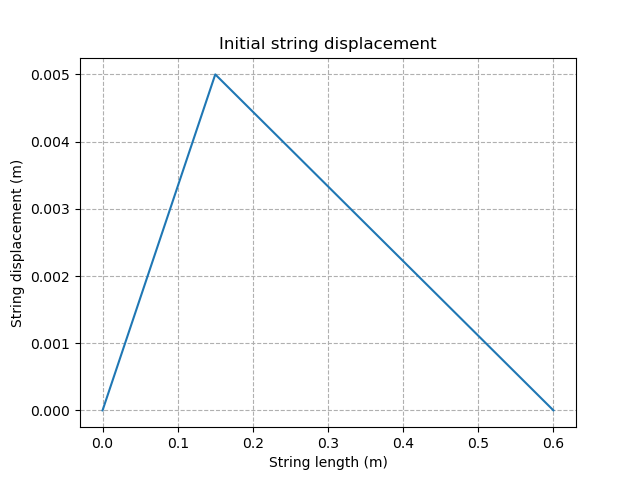

In [1]:
# Your code...

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from matplotlib import animation
%matplotlib notebook

L = 0.6 # l of string in meters
dx = 0.001 # x increments
x_string = np.arange(0,L+dx,dx)

N = x_string.size

v = 396.0 # velocity in m/s
wavelength = 2*L # fund wavelength in m

freq = v / wavelength
print(f'fundamental frequency: {freq} Hz')

pick_amp = 0.005 # amplitude of pick for triangle initial u(x,0) in m
place = 0.15 # location of triangle apex in m

u0 = np.empty(N) # set up initial displacement array

for i,string in enumerate(x_string):
    if string <= place:
        u0[i] = pick_amp*string/place
    else:
        u0[i] = pick_amp-pick_amp/(L-place)*(string-place)

v0 = np.zeros(x_string.size)

plt.figure()
plt.plot(x_string,u0,label='initial string')
plt.title('Initial string displacement')
plt.xlabel('String length (m)')
plt.ylabel('String displacement (m)')
plt.grid(True,linestyle='--')
plt.show()


_______________________________________________________________________
Part b: (5 pts)

- set up the problem for solve_ivp
- Solve the equation for $u(x,t)$


In [2]:
# Your code...

# Laplacian
Laplacian = (np.diag(-2*np.ones(N)) + np.diag(np.ones(N-1),1) + np.diag(np.ones(N-1),-1)) / dx**2


k = 2.0


# set user def function for deriv
def myfunc(t, u):
    """
    
    u[0] = u(x[0])
    u[1] = u(x[1])
    :
    :
    u[N-1] = u(x[N-1])
    u[N] = d(u[0])/dt
    u[N+1] = d(u[1])/dt
    :
    :
    u[2N-1] = d(u[N-1])/dt
    
    
    Here is where we return the first derivatives in time
    
    which for the first N points is:
    
    du[:N]/dt   or du[:N]=u[N:]
    
    and for the second N points is:
    
    du[N:]/dt = d^2u[:N]/dt^2 = v^2*Laplacian . u[:N] or du[N:]= v^2*Laplacian . u[:N]
    
    i.e.
    
    du[0]/dt = d(u[0])/dt = u[N]
    du[1]/dt = d(u[1])/dt = u[N+1]
    :
    :
    du[N]/dt = d^2(u[0])/dt^2 = (v^2*Laplacian . u[:N])[0]
    du[N+1]/dt = d^2(u[1])/dt^2 = (v^2*Laplacian . u[:N])[1]
    :
    :
    
    
    like for 2nd order ode's were we had 1,2,...n coordinates and then their derivatives to give 2n
    first derivatives we now have a large N points in x and then N derivatives to give 2N total
    first derivatives. The first N in the returned solution array are sol.y[:N,i] are the x-position points
    at time sol.t[i]
    """
    du=np.zeros(2*N)  #set up array of twice the size of the number of grid points
    
    u[0]=0   #BC fixed string
    u[N-1]=0 #BC fixed string
    
    du[:N]=u[N:] #first N first derivatives are the upper N of the u array 

    du[0]=0  #BC fixed string
    du[N-1]=0  #BC fixed string
    
    #first time derivative of upper half N points=2nd derivative = v**2 x lapacian_matrix x u-array
    du[N:]=  -k*u[N:] + v**2 * Laplacian.dot(u[:N])
    du[N]=0  #BC fixed string
    du[-1]=0  #BC fixed string
    return du

# time array
t0 = 0
tf = 2.0
# tf = 0.1 # wont see decay -> use above to see decay
framerate = 44100
dt = 1/framerate
t_eval = np.arange(t0,tf+dt,dt)

# initial conditions
U0 = np.zeros(2*N)
U0[:N] = u0
U0[N:] = v0



# call solve_ivp
print('start')
sol = solve_ivp(myfunc,t_span=[t0,tf],y0=U0,t_eval=t_eval,method='RK23')
print('done')

start
done


<IPython.core.display.Javascript object>


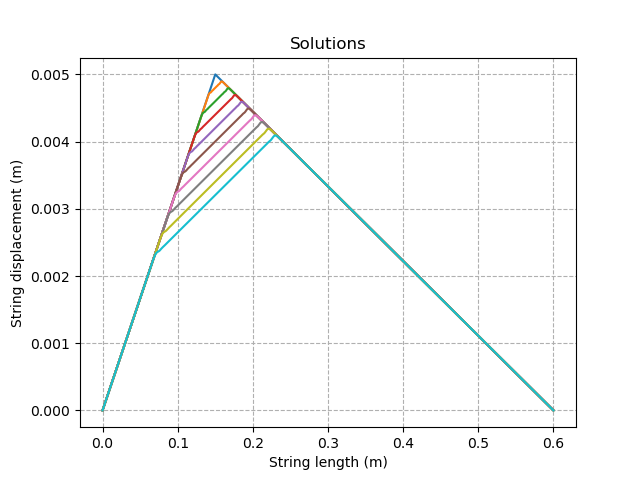

In [3]:
# signal = sol.y[:N,25] # use 28
plt.figure()
plt.title('Solutions')
plt.xlabel('String length (m)')
plt.ylabel('String displacement (m)')
plt.grid(True,linestyle='--')

for i in range(10):
    plt.plot(x_string,sol.y[:N,i] )
plt.show()

Part c: (4 pts)

- Make an animation of $u(x,t)$

<IPython.core.display.Javascript object>


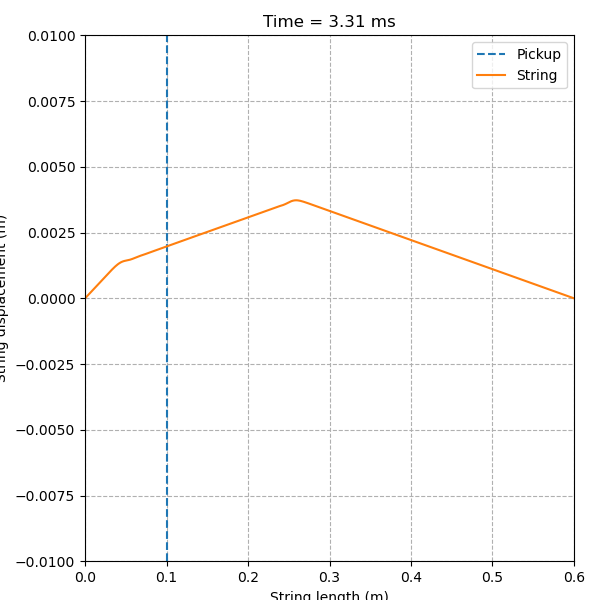

In [8]:
# Your code...

fig = plt.figure(figsize=(6,6))

x_pickup = 0.1

ax1 = plt.subplot(1,1,1)
ax1.set_xlim(0,L)
ax1.set_ylim(-2*pick_amp,2*pick_amp)
# set labels, title, update time

ax1.plot([x_pickup,x_pickup],[-2*pick_amp,2*pick_amp], '--',label='Pickup') # can visualize the amplitude at specific points

title = ax1.set_title(' ')
line1, = ax1.plot([],[],label='String')
ax1.legend()

def init():
    line1.set_data([],[])
    return line1,

def animate(i):
    line1.set_data(x_string,sol.y[:N,i])
    title.set_text('Time = {:.2f} ms'.format(1000*sol.t[i])) # could be an error here
    return line1,


anim = animation.FuncAnimation(fig=fig,func=animate,init_func=init,frames=len(sol.t),interval=5,blit=True)

plt.tight_layout()
plt.title('Initial string displacement')
plt.xlabel('String length (m)')
plt.ylabel('String displacement (m)')
plt.grid(True,linestyle='--')
plt.show()

__________________________________________________________________________
Part d: (5 pts)


Finally, a waveform signal $S(t)$ is generated by sampling the amplitude of the string at a certain fixed location that is meant to model something like an electric guitar pickup. That is

$S(t) = u(x_{pickup},t)$

- compute $S(t)$ for $x_{pickup}=0.1$ m
- display $S(t)$ vs $t$ for $0 \leq t \leq 0.1$ s
- display $S(t)$ vs $t$ for $0 \leq t \leq 2$ s
- display the magnitude of the Fourier Transform $|G(f)|$ for $0 \leq f \leq 2000$ Hz

pickup position 0.1  at position = 100
Delta f per bin =  0.49999433113003255


<IPython.core.display.Javascript object>


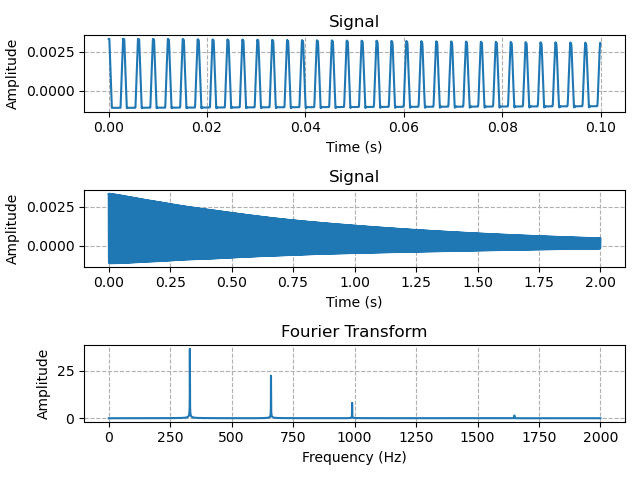

In [9]:
# Your code...

sample_time = 1/framerate

# pickup is at x_pickup
# x_pickup = 0.1
N_pickup = int(N*x_pickup/L)
print('pickup position', x_pickup, ' at position =', N_pickup)

signal = sol.y[N_pickup,:] # This is S(t)

# Take FFT
F_spectrum = np.fft.rfft(signal)
freq = np.fft.rfftfreq(t_eval.size,sample_time)

print('Delta f per bin = ', freq[1]-freq[0])

f_max = 2000

plt.figure()
# add nice things to the graph
plt.subplot(3,1,1)
plt.title('Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True,linestyle='--')
plt.plot(t_eval[t_eval<0.1],signal[t_eval<0.1])

plt.subplot(3,1,2)
plt.title('Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True,linestyle='--')
plt.plot(t_eval[t_eval<2],signal[t_eval<2])


plt.subplot(3,1,3)
plt.title('Fourier Transform')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.grid(True,linestyle='--')
plt.plot(freq[freq<f_max],np.absolute(F_spectrum[freq<f_max]))

plt.tight_layout()
plt.show()


___________________________________________________________________________
Part e: (1 pt)

Play the audio of the signal at the pickup $S(t)$

In [6]:
from IPython.display import Audio

# Your code...

Audio(signal,rate=framerate) # In the end, take the t back to 2 sec so you can actually listen to this

____________________________________________________________________________
Observations:
For the observations, I tweaked some parameters of the project and observed the section 4 graphs and section 5 audio. My observations are below in more detail. In summary, a higher amplitude results in a more rapid drop off due to the damping effect, and the altering the pickup location will change the frequencies of the signal. From my observations, the pickup values closer to 1m will result in a signal of lower frequencies, and vice versa. Ultimately it was pretty cool seeing the audio output as well as the animated graphs. I enjoyed this project a lot.



Comment on graphs
1. Pickup = 0.1m, amplitude = 0.3m
    - Signal over 0.1s
        - Begins to show a very slight decay by the end of the time interval. The decay is not significant.
    - Signal over 2s
        - The signal shows nearly a complete decay. By the end of the time interval, the signal is qualitatively less than a quarter of the magnitude it started with.
    - Fourier transform
        - Low frequencies dominate the frequency distribution. 
    - Audio
        - The sound resembles the signal over 2s graph. The audio starts relatively low pitched and decays almost entirely by the end of the audio clip.

2. Pickup = 0.4m, amplitude = 0.3m
    - Signal over 0.1s
        - The signal shows a slight decay, almost exactly like the pickup at 0.1m analysis. The signal seems to experience a saturation at the peaks. It reaches the top magnitude and plateaus before oscillating back.
    - Signal over 2s
        - The signal decays very similar to the pickup at 0.1m analysis. However, the magnitude is seems to maintain strength for a little while longer. 
    - Fourier transform
        - Low frequencies dominate the frequency distribution, much more than the pickup at 0.1m analysis. 
    - Audio
        - The sound resembles the signal over 2s graph. The audio is of a lower pitch and does not drop off nearly as fast as the 0.1m analysis.

3. Pickup = 0.1m, amplitude = 0.5m
    - Signal over 0.1s
        - Very similar to the amplitude of 0.3m, the signal has noticeably less magnitude than at the start of the time interval.
    - Signal over 2s
        - Very similar to the amplitude of 0.3m, however the signal has a more rapid descent in magnitude.
    - Fourier transform
        - Very similar to the amplitude of 0.3m, still dominated by lower frequencies, however there is a spreak from ~ 250 - 1000Hz as opposed to the 0.4m case.
    - Audio
        - Audio drops off significantly and is almost completely silent by the end of the clip.

4. Pickup = 0.4m, amplitude = 0.5m
    - Signal over 0.1s
        - The signal is the same as the signal with the amplitude of 0.3m, however, and perhaps obviously, the magnitude of the signal is higher. The signal decays and has a saturation at the peaks. It seems the magnitude is stronger as it oscillates across the origin.
    - Signal over 2s
        - The signal is the same as the signal with the amplitude of 0.3m just with a higher magnitude. The signal does seem to decay to a slightly lower amplitude at the conclusion of the time interval, however I do not have a visual comparison of both graphs.
    - Fourier transform
        - Fourier transform is the same as the amplitude of 0.3m, dominated by lower frequencies.
    - Audio
        - The audio definitely loses amplitude by the end of the 2s recording. This is reflected in the Signal over 2s graph as well.
____________________________________________________________________________